In [1]:
from scipy.io import mmread
import pandas as pd
import numpy as np

np.random.seed(42)

In [2]:
df = pd.DataFrame(mmread('data/E-MTAB-10290.aggregated_filtered_normalised_counts.mtx').todense())
df

KeyboardInterrupt: 

In [ ]:
# read the gene names from file and add them as row names
with open('data/E-MTAB-10290.aggregated_filtered_normalised_counts.mtx_rows') as f:
    gene_names = [i.split()[0] for i in f.read().splitlines()]
df.index = gene_names

# read the cell names from file and add them as column names
with open('data/E-MTAB-10290.aggregated_filtered_normalised_counts.mtx_cols') as f:
    cell_names = f.read().splitlines()
df.columns = cell_names

# transpose the dataframe so that the genes are the columns and the cells are the rows
df = df.transpose()
df

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000289565,ENSG00000289604,ENSG00000289685,ENSG00000289690,ENSG00000289694,ENSG00000289695,ENSG00000289697,ENSG00000289700,ENSG00000289701,ENSG00000289716
SAMEA8461660-AAACCCAAGGTTCAGG,0.00000,0.000000,0.0000,0.0,0.0,111.567640,76.132470,0.00000,0.0,0.000000,...,50.755005,0.0,38.066235,0.000000,152.264940,0.0,0.000000,0.0,0.000000,0.00000
SAMEA8461660-AAACCCAAGGTTTACC,0.00000,0.000000,88.5034,0.0,0.0,102.391530,0.000000,0.00000,0.0,0.000000,...,0.000000,0.0,177.006800,0.000000,132.755100,0.0,0.000000,0.0,44.251700,0.00000
SAMEA8461660-AAACCCAGTAGCTGAG,0.00000,0.000000,0.0000,0.0,0.0,0.000000,82.331635,0.00000,0.0,0.000000,...,0.000000,0.0,0.000000,82.331635,0.822164,0.0,0.000000,0.0,41.165817,0.00000
SAMEA8461660-AAACCCAGTCAGATTC,0.00000,0.000000,0.0000,0.0,0.0,0.000074,0.000000,0.00000,0.0,0.000000,...,147.972780,0.0,0.000000,0.000000,221.959170,0.0,0.000000,0.0,147.972780,0.00000
SAMEA8461660-AAACCCAGTGCGAACA,0.00000,0.000000,0.0000,0.0,0.0,0.000000,190.385530,0.00000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,47.596382,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAMEA8461667-TTTGGTTCACTTGACA,0.00000,0.000000,0.0000,0.0,0.0,54.591175,135.446290,0.00000,0.0,0.000000,...,0.000000,0.0,22.574383,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000
SAMEA8461667-TTTGGTTTCCCATGGG,0.00000,191.640100,0.0000,0.0,0.0,152.172240,76.086120,0.00000,0.0,0.000000,...,0.000000,0.0,76.086120,0.000000,0.000000,0.0,0.000000,0.0,114.129180,0.00000
SAMEA8461667-TTTGTTGAGATCCAAA,129.39122,0.000000,0.0000,0.0,0.0,32.347805,129.391220,110.22637,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,226.434630,0.0,32.347805,0.0,0.000000,64.69561
SAMEA8461667-TTTGTTGCAGCCGTCA,0.00000,57.774826,0.0000,0.0,0.0,69.143150,251.584960,0.00000,0.0,56.996223,...,0.000000,0.0,50.316994,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000


In [ ]:
# import the experimental design from tsv file
design = pd.read_csv('data/ExpDesign-E-MTAB-10290.tsv', sep='\t')

# keep only the columns we need
design = design[['Assay', 'Sample Characteristic[disease]']]
design.columns = ['cell', 'disease']

design.set_index('cell', inplace=True)

design = np.ndarray.flatten(design.values)
design

array(['normal', 'normal', 'normal', ..., 'cutaneous melanoma',
       'cutaneous melanoma', 'cutaneous melanoma'], dtype=object)

In [ ]:
#df = df.tocsr()

# get sample of 1000 cells and 1000 genes
#df = df[np.random.choice(df.shape[0], 1000, replace=False), :]
#df = df[:, np.random.choice(df.shape[1], 1000, replace=False)]


# get 1000 cells from the design
#design = design[np.random.choice(design.shape[0], 1000, replace=False)]

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# set the seed for reproducibility
torch.manual_seed(42)

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df, design, test_size=0.2, random_state=43)

In [ ]:
np.unique(y_test, return_counts=True)

(array(['cutaneous melanoma', 'normal'], dtype=object), array([2418, 3423]))

In [ ]:
# encode the target labels into integers
le = LabelEncoder()
#y_train = le.fit_transform(y_train.values.ravel())
#y_test = le.transform(y_test.values.ravel())
y_train = le.fit_transform(y_train.ravel())
y_test = le.transform(y_test.ravel())

le.classes_

array(['cutaneous melanoma', 'normal'], dtype=object)

In [ ]:
# convert the data into PyTorch tensors
#X_train = torch.from_numpy(X_train.todense()).to_sparse()
#X_train = X_train.tocoo()
#X_train = torch.sparse.LongTensor(torch.LongTensor([X_train.row.tolist(), X_train.col.tolist()]),torch.FloatTensor(X_train.data))
#X_test = torch.from_numpy(X_test.todense()).to_sparse()
#X_test = X_test.tocoo()
#X_test = torch.sparse.LongTensor(torch.LongTensor([X_test.row.tolist(), X_test.col.tolist()]),torch.FloatTensor(X_test.data))

X_train = torch.from_numpy(X_train.values).float().to(device)
X_test = torch.from_numpy(X_test.values).float().to(device)

# convert the target labels into torch tensors
y_train = torch.squeeze(torch.from_numpy(y_train)).long().to(device)
y_test = torch.squeeze(torch.from_numpy(y_test)).long().to(device)

# create Tensor datasets
train_ds = data_utils.TensorDataset(X_train, y_train)
test_ds = data_utils.TensorDataset(X_test, y_test)

# define the batch size
batch_size = 32

# load the data
train_dl = data_utils.DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_dl = data_utils.DataLoader(test_ds, batch_size=batch_size, shuffle=True)

In [ ]:
# define the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(25511, 5000)
        self.fc2 = nn.Linear(5000, 2000)
        self.fc3 = nn.Linear(2000, 1000)
        self.fc4 = nn.Linear(1000, 100)
        self.fc5 = nn.Linear(100, 2)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = F.relu(self.fc4(x))
        #x = self.dropout(x)
        return self.fc5(x)
    
# initialize the model
model = Net()

# define the optimizer and the loss
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# define the training function
def train(model, train_dl, optimizer, criterion):
    model.train()
    running_loss = 0
    for i, (X_batch, y_batch) in enumerate(train_dl):
        #if i % 100 == 0:
            #print(i)
        optimizer.zero_grad()
        y_pred = model(X_batch.to(device))
        loss = criterion(y_pred, y_batch.to(device))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_dl)
    return model, train_loss

# define the testing function
def test(model, test_dl, criterion):
    model.eval()
    running_loss = 0
    correct, total = 0, 0
    predictions, truth = [], []
    with torch.no_grad():
        for i, (X_batch, y_batch) in enumerate(test_dl):
            #if i % 100 == 0:
                #print(i)
            y_pred = model(X_batch.to(device))
            loss = criterion(y_pred, y_batch.to(device))
            running_loss += loss.item()
            _, predicted = torch.max(y_pred.data, 1)
            #if i == 0:
                #print(y_pred)
                #print(predicted)
                #print(y_batch)
            predictions.extend(predicted.cpu().numpy())
            truth.extend(y_batch.cpu().numpy())
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    val_loss = running_loss / len(test_dl)
    return val_loss, correct / total, predictions, truth

In [ ]:
# send the model to the device
model.to(device)

Net(
  (fc1): Linear(in_features=25511, out_features=5000, bias=True)
  (fc2): Linear(in_features=5000, out_features=2000, bias=True)
  (fc3): Linear(in_features=2000, out_features=1000, bias=True)
  (fc4): Linear(in_features=1000, out_features=100, bias=True)
  (fc5): Linear(in_features=100, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [ ]:
# train the model for 100 epochs
epochs = 5
train_losses, val_losses, val_accs = [], [], []
for epoch in range(epochs):
    model, train_loss = train(model, train_dl, optimizer, criterion)
    val_loss, val_acc, _, _ = test(model, test_dl, criterion)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Val Loss: {val_loss:.3f} | Val Acc: {val_acc:.2f} |')

| Epoch: 01 | Train Loss: 3.183 | Val Loss: 0.002 | Val Acc: 1.00 |
| Epoch: 02 | Train Loss: 0.394 | Val Loss: 0.679 | Val Acc: 0.59 |
| Epoch: 03 | Train Loss: 0.690 | Val Loss: 0.678 | Val Acc: 0.59 |
| Epoch: 04 | Train Loss: 0.681 | Val Loss: 0.678 | Val Acc: 0.59 |
| Epoch: 05 | Train Loss: 0.699 | Val Loss: 0.678 | Val Acc: 0.59 |


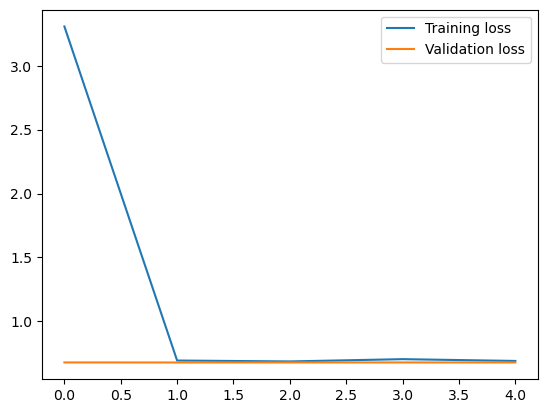

In [ ]:
# plot the training and validation losses
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()

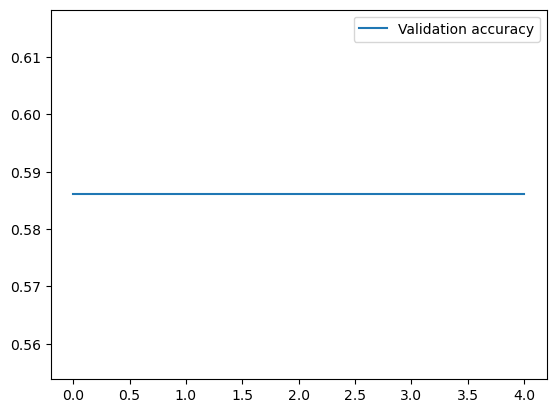

In [ ]:
# plot the validation accuracy
plt.plot(val_accs, label='Validation accuracy')
plt.legend()
plt.show()

In [ ]:
# print the classification report
_, _, predictions, truth = test(model, test_dl, criterion)
print(classification_report(truth, predictions))

# print the confusion matrix
cm = confusion_matrix(truth, predictions)
print(cm)

# print the accuracy score
print(accuracy_score(truth, predictions))

# save the model
torch.save(model.state_dict(), 'model.pt')

/home/debian/miniconda3/envs/MVI_Vojta2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/debian/miniconda3/envs/MVI_Vojta2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/debian/miniconda3/envs/MVI_Vojta2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2418
           1       0.59      1.00      0.74      3423

    accuracy                           0.59      5841
   macro avg       0.29      0.50      0.37      5841
weighted avg       0.34      0.59      0.43      5841

[[   0 2418]
 [   0 3423]]
0.5860297894196199


In [ ]:
# load the model
model = Net()
model.load_state_dict(torch.load('model.pt'))

# define the prediction function
def predict(model, test_dl):
    model.eval()
    predictions = []
    with torch.no_grad():
        for i, (X_batch, _) in enumerate(test_dl):
            y_pred = model(X_batch)
            _, predicted = torch.max(y_pred.data, 1)
            predictions.extend(predicted.numpy())
    return predictions

# predict the labels for the test set
predictions = predict(model, test_dl)
predictions = le.inverse_transform(predictions)
predictions

# print the cell names and the predicted labels
print('cell\tpredicted label')
for cell, prediction in zip(cell_names, predictions):
    print(f'{cell}\t{prediction}')

# print the cell names and the true labels
print('cell\ttrue label')
for cell, truth in zip(cell_names, df['disease']):
    print(f'{cell}\t{truth}')

# print the cell names and the predicted and true labels
print('cell\tpredicted label\ttrue label')
for cell, prediction, truth in zip(cell_names, predictions, df['disease']):
    print(f'{cell}\t{prediction}\t{truth}')

# print the cell names and the predicted and true labels for the cells that were misclassified
print('cell\tpredicted label\ttrue label')
for cell, prediction, truth in zip(cell_names, predictions, df['disease']):
    if prediction != truth:
        print(f'{cell}\t{prediction}\t{truth}')

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)